##### Supp. Figure 9

P = 0.02957875956354577


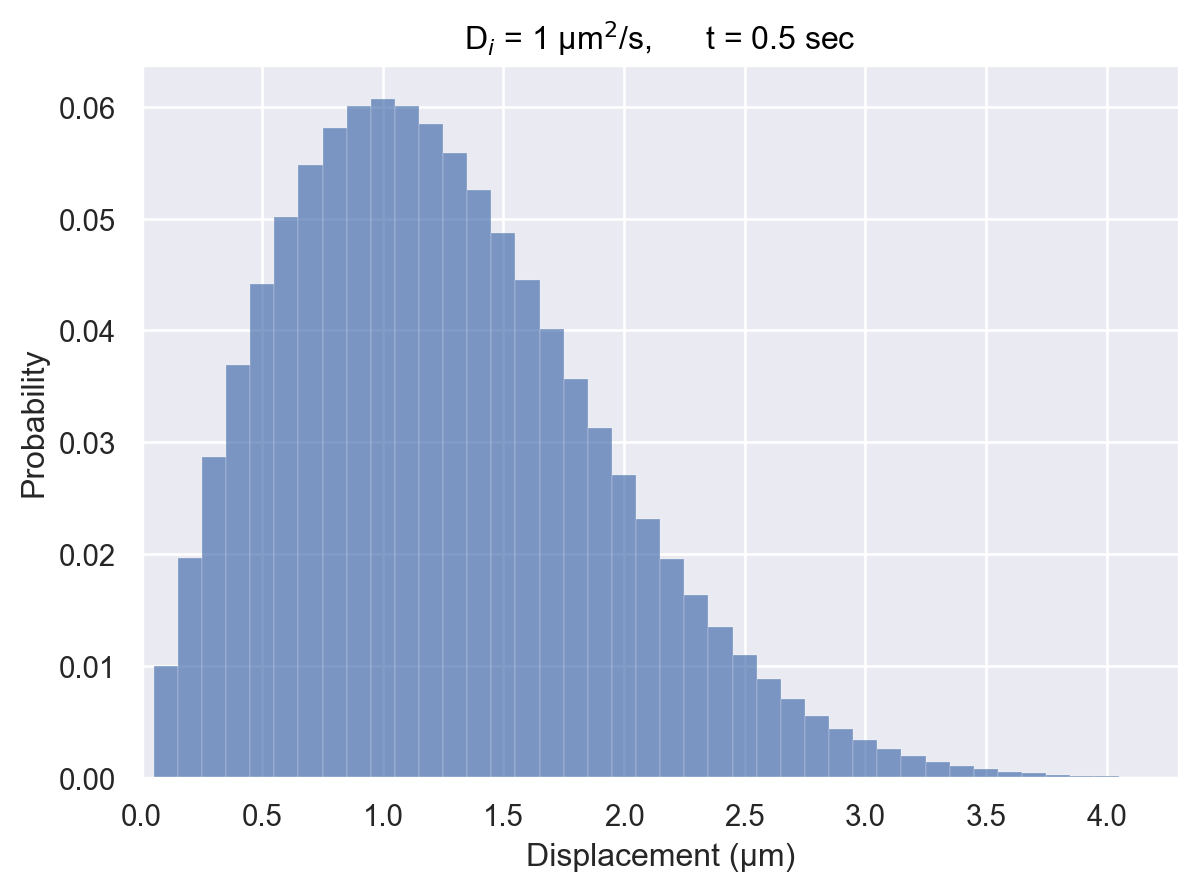

In [129]:
import pandas as pd
import numpy as np
import seaborn.objects as so 

Di = 1  # Diffusion coefficient
t = 0.5  # Frame time

# Equation based on Pinholt et al., PNAS 2021

df = (pd.DataFrame({'r':np.arange(0, 50, 0.1)})
      .assign(P_r=lambda df: df.r/(2*Di*t) * np.exp(-df.r**2/(4*Di*t)))
      .assign(P_r=lambda df: df.P_r / df.P_r.sum())
      )

xlim = df.query('P_r.cumsum() > 0.9999').r.iloc[0]

print(f'P = {df.query("r < 0.3").P_r.sum()}')

(
    so.Plot(df, x='r', y='P_r')
    .add(so.Bars())
    .label(x='Displacement (µm)', y='Probability', title=f'D$_i$ = {Di} µm$^2$/s,\t t = {t} sec')
    .limit(x=(0, xlim))
    .save(loc='D:\DanielThedie\Python\RecB_article\SI_Figures\Displacements_distribution.pdf', format='pdf', bbox_inches='tight')
)